In [15]:
# TASK 1: EXPLORATORY DATA ANALYSIS (EDA)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [16]:

#  DATA LOADING
# CORRECT PATH: data/ (from Coursework folder)
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset Shape: (7043, 21)

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:

#  DATA BASIC INFO
print("=" * 50)
print("DATASET INFORMATION")
print("=" * 50)

print("\nColumn Names and Data Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

DATASET INFORMATION

Column Names and Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
C

TARGET VARIABLE: CHURN
✅ Saved: ../reports/eda_plots/churn_distribution.png


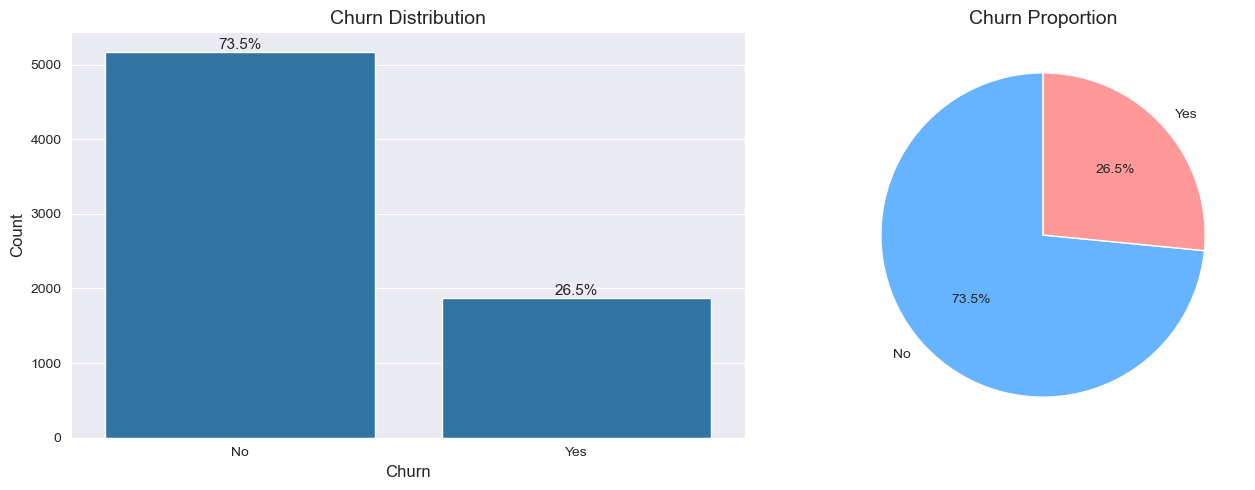


Churn Rate: 26.5%
Class Imbalance Ratio: 2.8:1


In [18]:

#  TARGET VARIABLE ANALYSIS
print("=" * 50)
print("TARGET VARIABLE: CHURN")
print("=" * 50)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Churn', ax=axes[0])
axes[0].set_title('Churn Distribution', fontsize=14)
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

# Add percentage labels
total = len(df)
for p in axes[0].patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    axes[0].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=11)

# Pie chart
churn_counts = df['Churn'].value_counts()
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
            colors=['#66b3ff', '#ff9999'], startangle=90)
axes[1].set_title('Churn Proportion', fontsize=14)

plt.tight_layout()

# CORRECT SAVE PATH: reports/eda_plots/
plt.savefig('../reports/eda_plots/churn_distribution.png', dpi=300, bbox_inches='tight')
print("Saved: ../reports/eda_plots/churn_distribution.png")

plt.show()

print(f"\nChurn Rate: {churn_counts['Yes'] / total * 100:.1f}%")
print(f"Class Imbalance Ratio: {churn_counts['No'] / churn_counts['Yes']:.1f}:1")

NUMERICAL FEATURES ANALYSIS

Converting TotalCharges to numeric...
   Found 11 missing values
   Filled with median: 1397.47
✅ Saved: ../reports/eda_plots/numerical_features.png


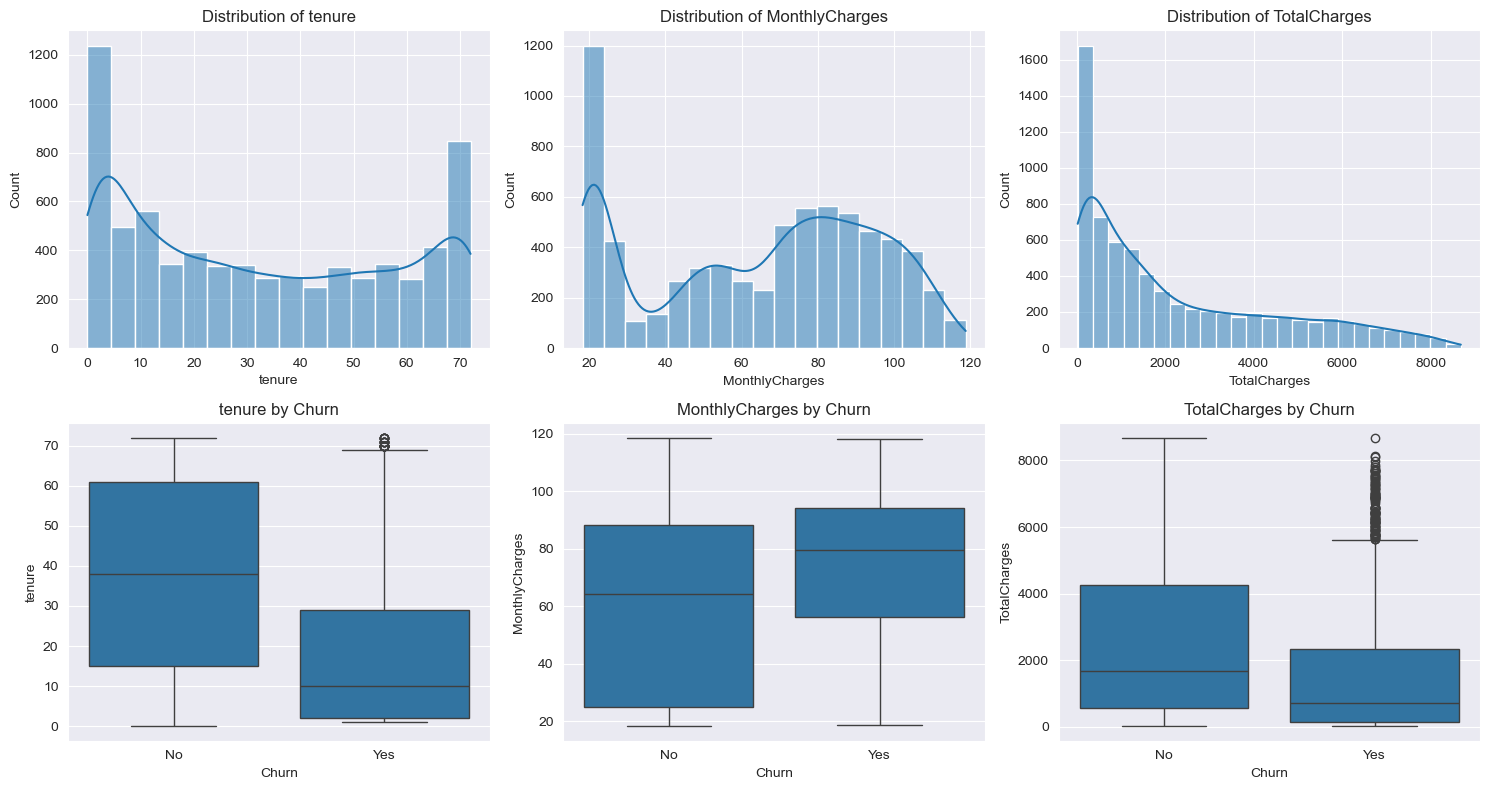

In [19]:
#  NUMERICAL FEATURES ANALYSIS
print("=" * 50)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 50)

# Fix TotalCharges column first
print("\nConverting TotalCharges to numeric...")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
nan_count = df['TotalCharges'].isnull().sum()
print(f"   Found {nan_count} missing values")

# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print(f"   Filled with median: {df['TotalCharges'].median():.2f}")

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    # Distribution plot
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)

    # Box plot by churn
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i + 3])
    axes[i + 3].set_title(f'{col} by Churn', fontsize=12)
    axes[i + 3].set_xlabel('Churn', fontsize=10)
    axes[i + 3].set_ylabel(col, fontsize=10)

plt.tight_layout()

# CORRECT SAVE PATH
plt.savefig('../reports/eda_plots/numerical_features.png', dpi=300, bbox_inches='tight')
print("Saved: ../reports/eda_plots/numerical_features.png")

plt.show()

CATEGORICAL FEATURES ANALYSIS


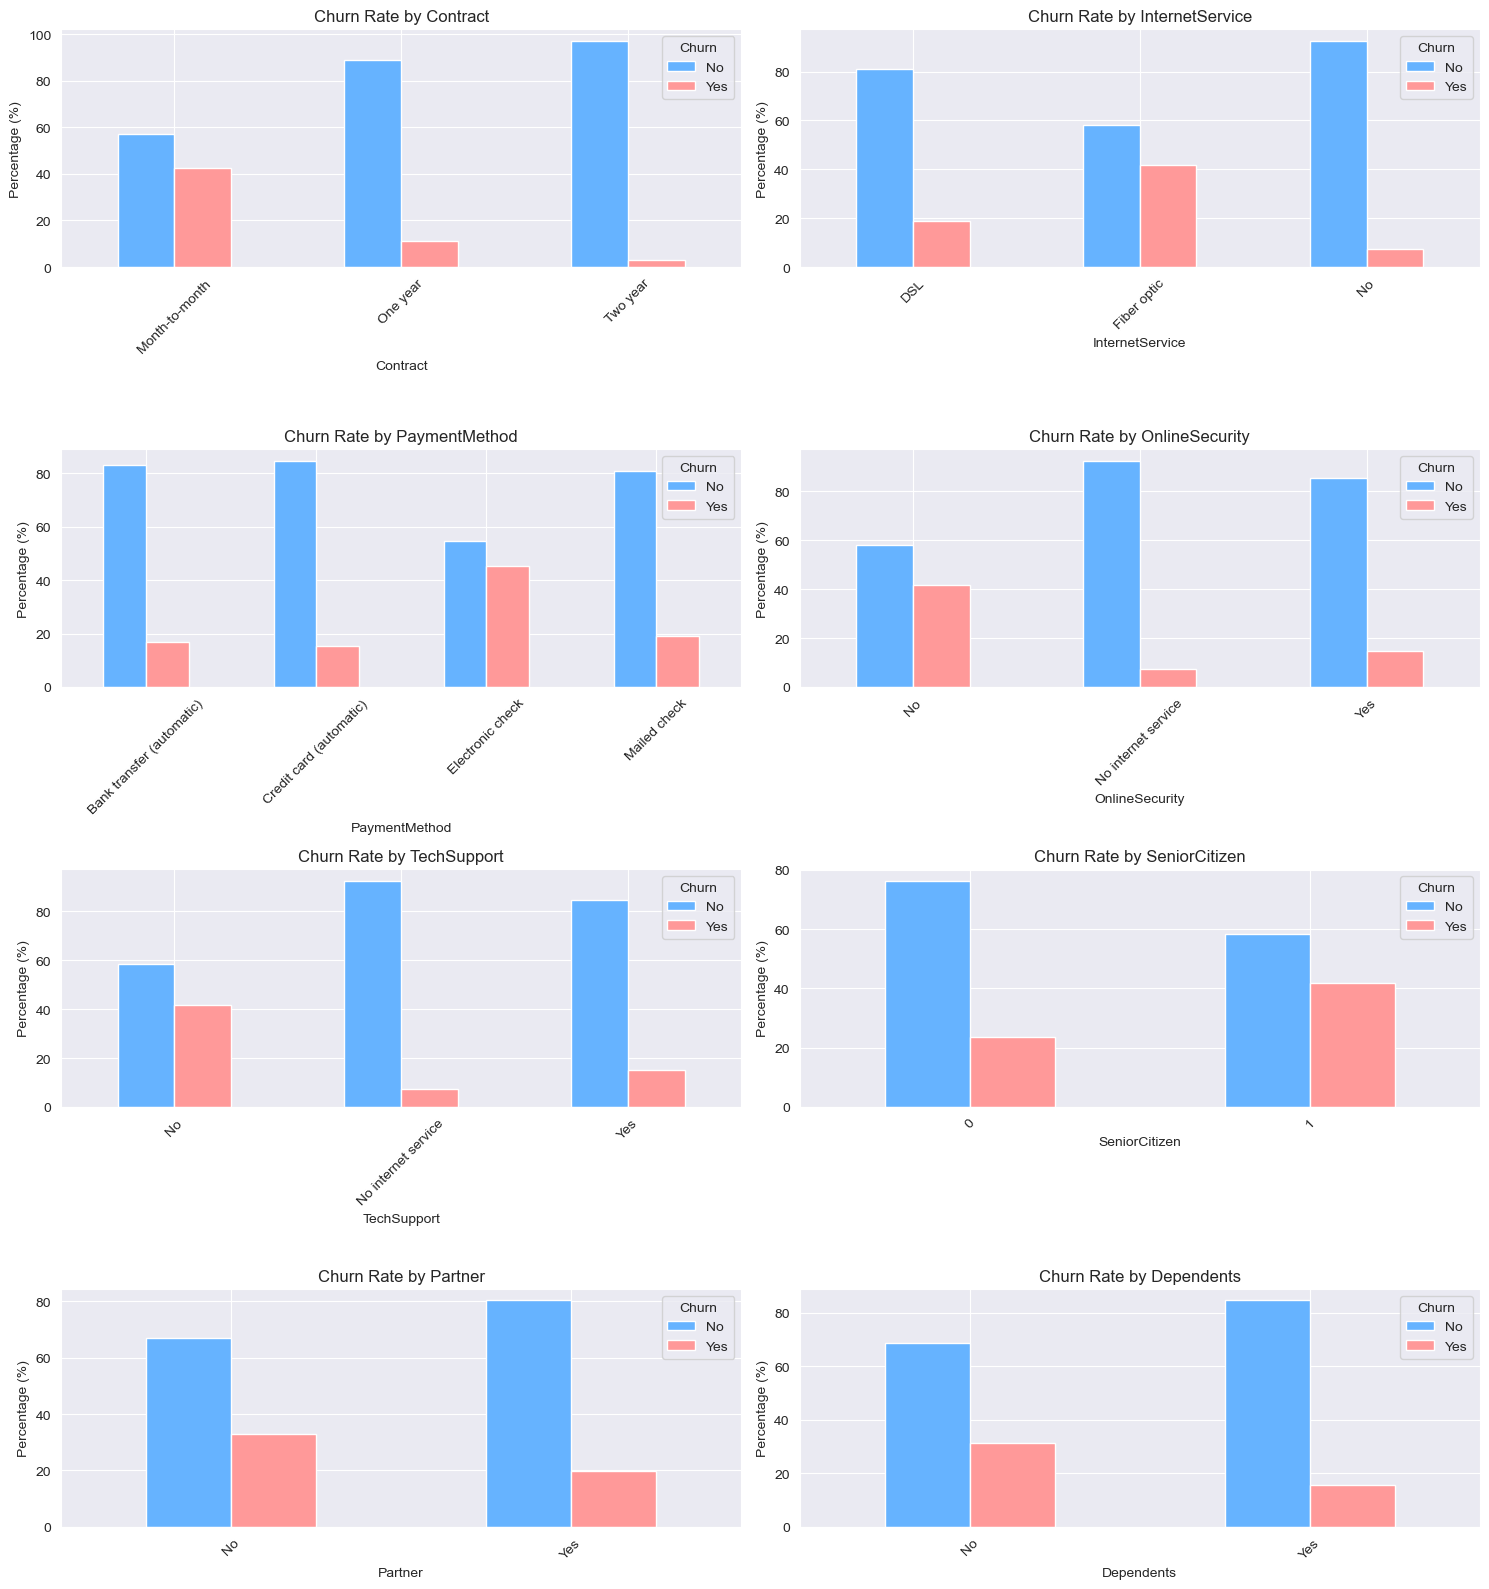

In [20]:

# CATEGORICAL FEATURES ANALYSIS
print("=" * 50)
print("CATEGORICAL FEATURES ANALYSIS")


categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

# Select top 8 categorical features for visualization
top_categorical = ['Contract', 'InternetService', 'PaymentMethod', 'OnlineSecurity',
                   'TechSupport', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(4, 2, figsize=(15, 16))
axes = axes.flatten()

for i, col in enumerate(top_categorical):
    # Create crosstab
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    # Plot
    ct.plot(kind='bar', ax=axes[i], color=['#66b3ff', '#ff9999'])
    axes[i].set_title(f'Churn Rate by {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Percentage (%)', fontsize=10)
    axes[i].legend(title='Churn', loc='upper right')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/eda_plots/categorical_features.png', dpi=300, bbox_inches='tight')
plt.show()

CORRELATION ANALYSIS


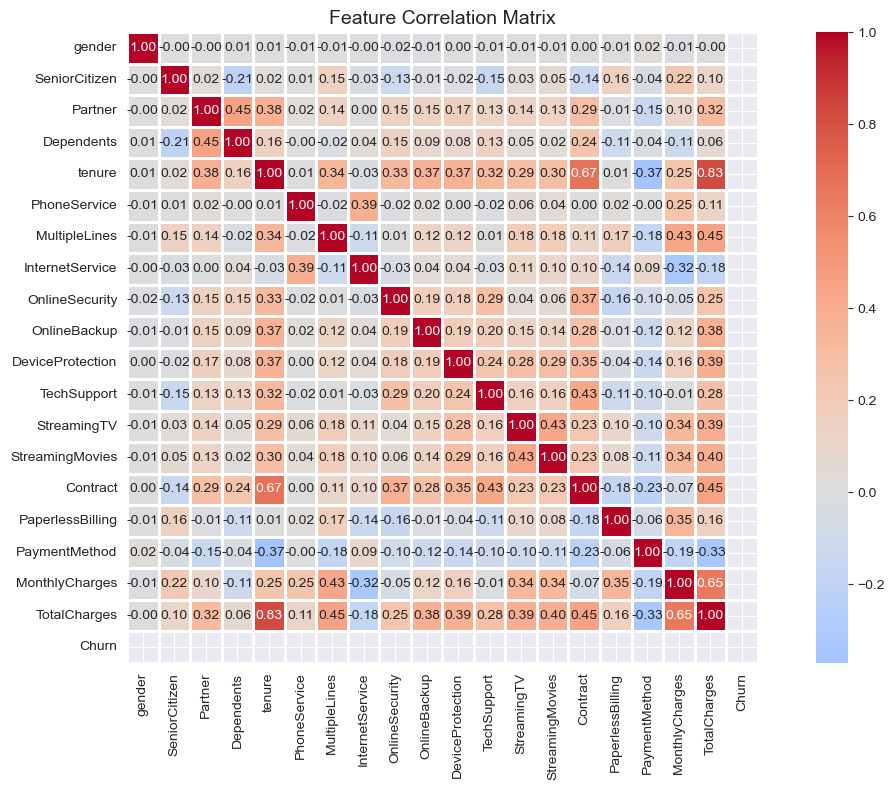


Top Features Correlated with Churn:
gender            NaN
SeniorCitizen     NaN
Partner           NaN
Dependents        NaN
tenure            NaN
PhoneService      NaN
MultipleLines     NaN
InternetService   NaN
OnlineSecurity    NaN
OnlineBackup      NaN
Name: Churn, dtype: float64


In [21]:

#6. CORRELATION ANALYSIS
print("=" * 50)
print("CORRELATION ANALYSIS")

# Convert categorical to numerical for correlation
df_corr = df.copy()
for col in df_corr.select_dtypes(include=['object']).columns:
    if col != 'customerID':
        df_corr[col] = df_corr[col].astype('category').cat.codes

#Convert Churn to numeric
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(12, 8))
correlation_matrix = df_corr.drop('customerID', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.savefig('../reports/eda_plots/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Top correlations with Churn
churn_corr = correlation_matrix['Churn'].sort_values(ascending=False)
print("\nTop Features Correlated with Churn:")
print(churn_corr.head(10))

**Decision Tree Model**


In [43]:
from imblearn.combine import SMOTEENN
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings('ignore')

In [5]:

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [6]:
print("Converting TotalCharges to numeric...")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
nan_count = df['TotalCharges'].isnull().sum()
print(f"   Found {nan_count} missing values")
# Fill missing values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print(f"   Filled with median: {df['TotalCharges'].median():.2f}")
df = df.drop('customerID', axis=1)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("   Encoded target: Yes→1, No→0")
X = df.drop('Churn', axis=1)
y = df['Churn']
# Convert categorical variables to numeric codes (simple approach)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].astype('category').cat.codes

Converting TotalCharges to numeric...
   Found 11 missing values
   Filled with median: 1397.47
   Encoded target: Yes→1, No→0


In [7]:
print(f"Features shape: {X.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")
# SPLIT ONCE AND KEEP IT CONSISTENT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features: {X_train.shape[1]}")
print(f"Original training distribution: {y_train.value_counts().to_dict()}")
print(f"Original test distribution: {y_test.value_counts().to_dict()}")

Features shape: (7043, 19)
Target distribution: {0: 5174, 1: 1869}
Training set: 5634 samples
Test set: 1409 samples
Features: 19
Original training distribution: {0: 4139, 1: 1495}
Original test distribution: {0: 1035, 1: 374}


In [8]:
#  BASELINE MODELS
print("\n" + "=" * 50)
print("BASELINE DECISION TREE")
print("=" * 50)

# Baseline fixed model
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
model_dt.fit(X_train, y_train)
y_pred_baseline = model_dt.predict(X_test)

print(f"Baseline Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"Baseline Model Score: {model_dt.score(X_test, y_test):.4f}")


BASELINE DECISION TREE
Baseline Accuracy: 0.7821
Baseline Model Score: 0.7821


In [9]:
#  BASELINE WITH HYPERPARAMETER TUNING
print("\n" + "=" * 50)
print("BASELINE MODEL - HYPERPARAMETER TUNING")
print("=" * 50)

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

# Create and fit tuned model
baseline_tuned = GridSearchCV(
    DecisionTreeClassifier(random_state=100),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

baseline_tuned.fit(X_train, y_train)
y_pred_baseline_tuned = baseline_tuned.predict(X_test)

print(f"Best Parameters: {baseline_tuned.best_params_}")
print(f"Tuned Accuracy: {accuracy_score(y_test, y_pred_baseline_tuned):.4f}")


BASELINE MODEL - HYPERPARAMETER TUNING
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tuned Accuracy: 0.7850


In [13]:

# SMOTEENN MODELS WITH PIPELINE
print("\n" + "=" * 50)
print("SMOTEENN MODELS (WITH PIPELINE)")
print("=" * 50)

from imblearn.pipeline import Pipeline

# Create pipeline
smote_pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',
        random_state=100,
        max_depth=6,
        min_samples_leaf=8
    ))
])

# Train with ONE line
smote_pipeline.fit(X_train, y_train)

# Predict with ONE line
y_pred_smote = smote_pipeline.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_smote):.4f}")

print(f"\nPipeline steps: {[step[0] for step in smote_pipeline.steps]}")


SMOTEENN MODELS (WITH PIPELINE)
Test Accuracy: 0.6977

Pipeline steps: ['smoteenn', 'classifier']


In [14]:
# SMOTEENN TUNED MODEL WITH PIPELINE

print("\n--- SMOTEENN Tuned Model (WITH PIPELINE - CORRECT) ---")

from imblearn.pipeline import Pipeline

# Create pipeline first
smote_tuning_pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=100))
])

# Parameter grid for ENTIRE pipeline
param_grid_smote = {
    'smoteenn__sampling_strategy': [0.5, 0.75, 1.0],  # Control SMOTEENN balance
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [4, 6, 8, 10, 12],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV with pipeline
smote_tuned = GridSearchCV(
    smote_tuning_pipeline,  # Use pipeline instead of just model
    param_grid_smote,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

# Fit on ORIGINAL X_train, y_train
smote_tuned.fit(X_train, y_train)

print(f"Best Parameters: {smote_tuned.best_params_}")
print(f"Best CV Score: {smote_tuned.best_score_:.4f}")

# Predict with best pipeline
y_pred_smote_tuned = smote_tuned.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_smote_tuned):.4f}")


--- SMOTEENN Tuned Model (WITH PIPELINE - CORRECT) ---
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 12, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10, 'smoteenn__sampling_strategy': 0.5}
Best CV Score: 0.7865
Test Accuracy: 0.7736


In [43]:
#  FINAL COMPARISON
print("\n" + "=" * 70)
print("FINAL COMPARISON OF ALL MODELS (ALL EVALUATED ON ORIGINAL TEST SET)")

# Prepare results
results = []

# Baseline fixed
acc1 = accuracy_score(y_test, y_pred_baseline)
prec1 = metrics.precision_score(y_test, y_pred_baseline, pos_label=1, zero_division=0)
rec1 = metrics.recall_score(y_test, y_pred_baseline, pos_label=1, zero_division=0)
f1_1 = metrics.f1_score(y_test, y_pred_baseline, pos_label=1, zero_division=0)
results.append(("Baseline (Fixed)", acc1, prec1, rec1, f1_1))

# Baseline tuned
acc2 = accuracy_score(y_test, y_pred_baseline_tuned)
prec2 = metrics.precision_score(y_test, y_pred_baseline_tuned, pos_label=1, zero_division=0)
rec2 = metrics.recall_score(y_test, y_pred_baseline_tuned, pos_label=1, zero_division=0)
f1_2 = metrics.f1_score(y_test, y_pred_baseline_tuned, pos_label=1, zero_division=0)
results.append(("Baseline (Tuned)", acc2, prec2, rec2, f1_2))

# SMOTEENN fixed
acc3 = accuracy_score(y_test, y_pred_smote)
prec3 = metrics.precision_score(y_test, y_pred_smote, pos_label=1, zero_division=0)
rec3 = metrics.recall_score(y_test, y_pred_smote, pos_label=1, zero_division=0)
f1_3 = metrics.f1_score(y_test, y_pred_smote, pos_label=1, zero_division=0)
results.append(("SMOTEENN (Fixed)", acc3, prec3, rec3, f1_3))

# SMOTEENN tuned
acc4 = accuracy_score(y_test, y_pred_smote_tuned)
prec4 = metrics.precision_score(y_test, y_pred_smote_tuned, pos_label=1, zero_division=0)
rec4 = metrics.recall_score(y_test, y_pred_smote_tuned, pos_label=1, zero_division=0)
f1_4 = metrics.f1_score(y_test, y_pred_smote_tuned, pos_label=1, zero_division=0)
results.append(("SMOTEENN (Tuned)", acc4, prec4, rec4, f1_4))

# Display results
print(f"\n{'Model':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 65)

for name, acc, prec, rec, f1 in results:
    print(f"{name:<25} {acc:<10.4f} {prec:<10.4f} {rec:<10.4f} {f1:<10.4f}")

# Find best model
best_acc = max([acc for _, acc, _, _, _ in results])
best_models = [name for name, acc, _, _, _ in results if acc == best_acc]

print(f"\n{'=' * 70}")
print(f"BEST MODEL(S) BY ACCURACY: {', '.join(best_models)} (Accuracy: {best_acc:.4f})")

# Additional: Find best by F1-score (often better for imbalanced data)
best_f1 = max([f1 for _, _, _, _, f1 in results])
best_f1_models = [name for name, _, _, _, f1 in results if f1 == best_f1]
print(f"BEST MODEL(S) BY F1-SCORE: {', '.join(best_f1_models)} (F1: {best_f1:.4f})")


FINAL COMPARISON OF ALL MODELS (ALL EVALUATED ON ORIGINAL TEST SET)

Model                     Accuracy   Precision  Recall     F1-Score  
-----------------------------------------------------------------
Baseline (Fixed)          0.7821     0.5971     0.5508     0.5730    
Baseline (Tuned)          0.7850     0.6035     0.5535     0.5774    
SMOTEENN (Fixed)          0.6977     0.4622     0.8503     0.5989    
SMOTEENN (Tuned)          0.7736     0.5733     0.5749     0.5741    

BEST MODEL(S) BY ACCURACY: Baseline (Tuned) (Accuracy: 0.7850)
BEST MODEL(S) BY F1-SCORE: SMOTEENN (Fixed) (F1: 0.5989)


In [44]:

# ============ DETAILED REPORTS ============
print("\n" + "=" * 70)
print("DETAILED CLASSIFICATION REPORTS")

reports = [
    ("Baseline (Fixed)", y_test, y_pred_baseline),
    ("Baseline (Tuned)", y_test, y_pred_baseline_tuned),
    ("SMOTEENN (Fixed)", y_test, y_pred_smote),
    ("SMOTEENN (Tuned)", y_test, y_pred_smote_tuned)
]

for name, y_true, y_pred in reports:
    print(f"\n{name}:")
    print(classification_report(y_true, y_pred, labels=[0, 1], target_names=['No Churn', 'Churn']))
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print("-" * 50)


DETAILED CLASSIFICATION REPORTS

Baseline (Fixed):
              precision    recall  f1-score   support

    No Churn       0.84      0.87      0.85      1035
       Churn       0.60      0.55      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409

Confusion Matrix:
[[896 139]
 [168 206]]
--------------------------------------------------

Baseline (Tuned):
              precision    recall  f1-score   support

    No Churn       0.84      0.87      0.86      1035
       Churn       0.60      0.55      0.58       374

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.78      0.78      1409

Confusion Matrix:
[[899 136]
 [167 207]]
--------------------------------------------------

SMOTEENN (Fixed):
              precision    recall  f1-score   support

    No Churn     

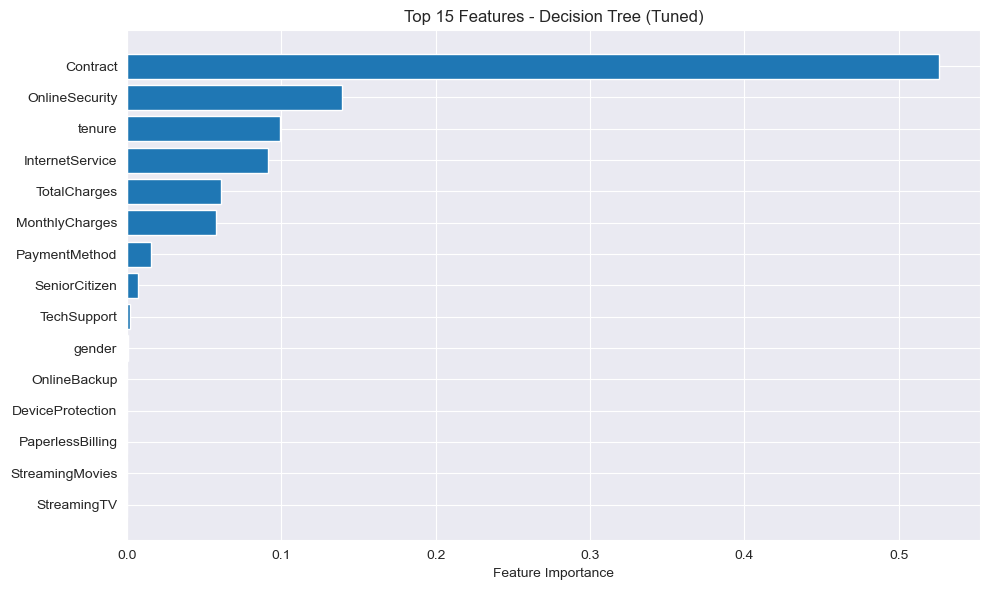

In [22]:
def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[-15:]  # Top 15 features

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importance[indices])
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Features - {title}')
    plt.tight_layout()
    plt.savefig(f'../reports/feature_importance_{title}.png', dpi=300)
    plt.show()

# Plot for your best Decision Tree model
plot_feature_importance(baseline_tuned.best_estimator_,
                       X.columns,
                       'Decision Tree (Tuned)')

***Neural Network***


In [23]:

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                             accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc)
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import warnings
import os

warnings.filterwarnings('ignore')

keras = tf.keras
layers = tf.keras.layers

In [24]:

# DATA PREPARATION FOR NEURAL NETWORK
print("\n" + "-" * 40)
print("DATA PREPARATION")
print("-" * 40)

# Load data
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')


----------------------------------------
DATA PREPARATION
----------------------------------------


In [25]:

# Data cleaning
print(f"Original data shape: {df.shape}")

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop ID column
df = df.drop('customerID', axis=1)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(f"Churn distribution:\n{df['Churn'].value_counts()}")
print(f"Churn rate: {(df['Churn'].sum() / len(df) * 100):.2f}%")

# ONE-HOT ENCODE CATEGORICALS
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f"Features after encoding: {X.shape[1]}")

Original data shape: (7043, 21)
Churn distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64
Churn rate: 26.54%
Features after encoding: 30


In [26]:
# SCALE NUMERICAL FEATURES

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("\nPrepared data shapes:")
print(f"X_train: {X_train_nn.shape}")
print(f"X_test: {X_test_nn.shape}")
print(f"y_train: {y_train_nn.shape}")
print(f"y_test: {y_test_nn.shape}")
print(f"\nTraining set class distribution:")
print(f"Class 0 (No Churn): {(y_train_nn == 0).sum()} ({(y_train_nn == 0).sum() / len(y_train_nn) * 100:.2f}%)")
print(f"Class 1 (Churn): {(y_train_nn == 1).sum()} ({(y_train_nn == 1).sum() / len(y_train_nn) * 100:.2f}%)")




Prepared data shapes:
X_train: (5634, 30)
X_test: (1409, 30)
y_train: (5634,)
y_test: (1409,)

Training set class distribution:
Class 0 (No Churn): 4139 (73.46%)
Class 1 (Churn): 1495 (26.54%)


In [27]:

# SIMPLE NEURAL NETWORK ARCHITECTURE
print("\n" + "-" * 40)
print("NEURAL NETWORK ARCHITECTURE")


def create_baseline_nn(input_dim):
    """Create a simple baseline neural network"""
    model = tf.keras.Sequential([
        # Input layer
        tf.keras.layers.Input(shape=(input_dim,)),

        # First hidden layer
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        # Second hidden layer
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),

        # Output layer (binary classification)
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    return model

# Create the model
input_dim = X_train_nn.shape[1]
model_nn = create_baseline_nn(input_dim)

# Compile the model
model_nn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy',
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.AUC(name='auc')]
)

# Display model summary
print("\nModel Summary:")
model_nn.summary()


----------------------------------------
NEURAL NETWORK ARCHITECTURE
----------------------------------------

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 192 (768.00 B)

In [28]:

# TRAINING THE NEURAL NETWORK
print("\n" + "-" * 40)
print("TRAINING NEURAL NETWORK")
print("-" * 40)

# Define callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )
]

# Train the model
history = model_nn.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

print(f"\nTraining completed in {len(history.history['loss'])} epochs")


----------------------------------------
TRAINING NEURAL NETWORK
----------------------------------------
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.6627 - auc: 0.7189 - loss: 0.6388 - precision: 0.4153 - recall: 0.6542 - val_accuracy: 0.7595 - val_auc: 0.8002 - val_loss: 0.5048 - val_precision: 0.5349 - val_recall: 0.6237 - learning_rate: 0.0010
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7553 - auc: 0.7938 - loss: 0.4935 - precision: 0.5372 - recall: 0.5842 - val_accuracy: 0.7799 - val_auc: 0.8165 - val_loss: 0.4584 - val_precision: 0.5770 - val_recall: 0.5966 - learning_rate: 0.0010
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7799 - auc: 0.8065 - loss: 0.4657 - precision: 0.5940 - recall: 0.5475 - val_accuracy: 0.7870 - val_auc: 0.8240 - val_loss: 0.4424 - val_precision: 0.6015 - val_recall: 0.5525 - learning_rate: 0.0010
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7886 - auc: 0.8194 - los

In [29]:

# EVALUATE NEURAL NETWORK
print("\n" + "-" * 40)
print("NEURAL NETWORK EVALUATION")
print("-" * 40)

# Make predictions
y_pred_nn_prob = model_nn.predict(X_test_nn)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int).flatten()

# Calculate metrics
nn_accuracy = accuracy_score(y_test_nn, y_pred_nn)
nn_precision = precision_score(y_test_nn, y_pred_nn, pos_label=1, zero_division=0)
nn_recall = recall_score(y_test_nn, y_pred_nn, pos_label=1, zero_division=0)
nn_f1 = f1_score(y_test_nn, y_pred_nn, pos_label=1, zero_division=0)
nn_auc = roc_auc_score(y_test_nn, y_pred_nn_prob)

print(f"Neural Network Metrics:")
print(f"  Accuracy:  {nn_accuracy:.4f}")
print(f"  Precision: {nn_precision:.4f}")
print(f"  Recall:    {nn_recall:.4f}")
print(f"  F1-Score:  {nn_f1:.4f}")
print(f"  AUC:       {nn_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_nn, y_pred_nn, target_names=['No Churn', 'Churn'], zero_division=0))

print("Confusion Matrix:")
cm_nn = confusion_matrix(y_test_nn, y_pred_nn)
print(cm_nn)


----------------------------------------
NEURAL NETWORK EVALUATION
----------------------------------------
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Metrics:
  Accuracy:  0.7906
  Precision: 0.6158
  Recall:    0.5615
  F1-Score:  0.5874
  AUC:       0.8389

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.87      0.86      1035
       Churn       0.62      0.56      0.59       374

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409

Confusion Matrix:
[[904 131]
 [164 210]]



----------------------------------------
TRAINING HISTORY VISUALIZATION
----------------------------------------


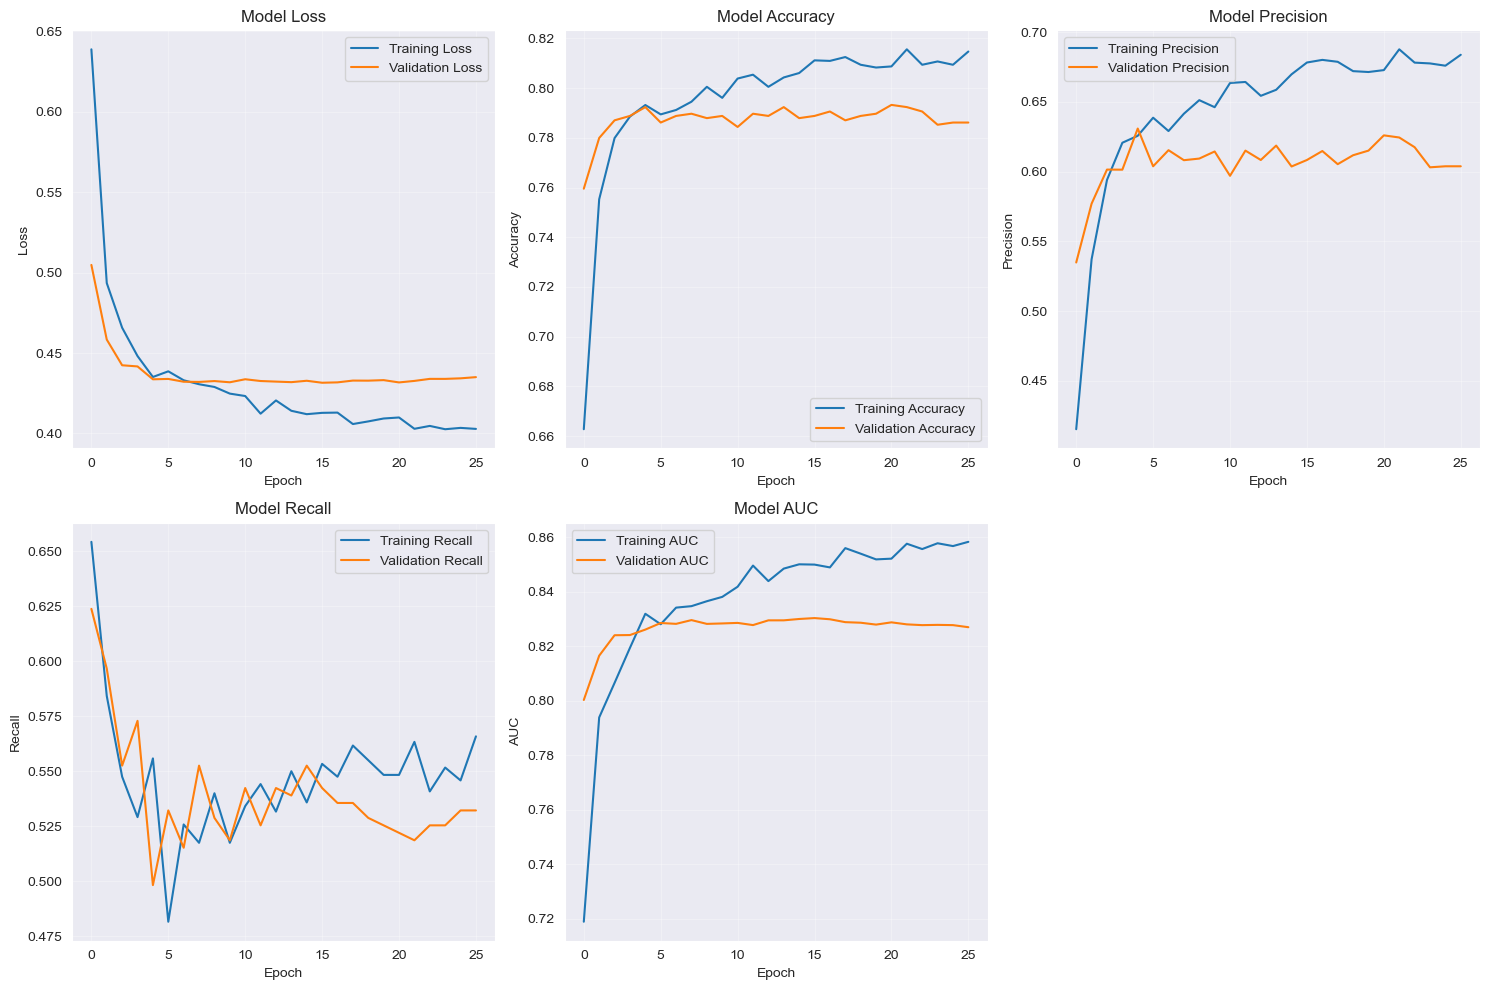

✅ Training history saved to: ../reports/NN_plots/neural_network_training_history.png


In [30]:

# VISUALIZE TRAINING HISTORY
print("\n" + "-" * 40)
print("TRAINING HISTORY VISUALIZATION")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot loss
axes[0, 0].plot(history.history['loss'], label='Training Loss')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Model Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot accuracy
axes[0, 1].plot(history.history['accuracy'], label='Training Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0, 1].set_title('Model Accuracy')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot precision
if 'precision' in history.history:
    axes[0, 2].plot(history.history['precision'], label='Training Precision')
    axes[0, 2].plot(history.history['val_precision'], label='Validation Precision')
    axes[0, 2].set_title('Model Precision')
    axes[0, 2].set_ylabel('Precision')
    axes[0, 2].set_xlabel('Epoch')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)

# Plot recall
if 'recall' in history.history:
    axes[1, 0].plot(history.history['recall'], label='Training Recall')
    axes[1, 0].plot(history.history['val_recall'], label='Validation Recall')
    axes[1, 0].set_title('Model Recall')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

# Plot AUC
if 'auc' in history.history:
    axes[1, 1].plot(history.history['auc'], label='Training AUC')
    axes[1, 1].plot(history.history['val_auc'], label='Validation AUC')
    axes[1, 1].set_title('Model AUC')
    axes[1, 1].set_ylabel('AUC')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

# Remove empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.savefig('../reports/NN_plots/neural_network_training_history.png', dpi=300, bbox_inches='tight')
plt.show()
print("Training history saved to: ../reports/NN_plots/neural_network_training_history.png")

In [31]:

# NEURAL NETWORK WITH CLASS WEIGHTS (Handling Imbalance)
print("\n" + "=" * 80)
print("NEURAL NETWORK WITH CLASS WEIGHTS")

# Calculate class weights to handle imbalance
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_nn),
    y=y_train_nn
)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"Class weights: {class_weight_dict}")
print(f"  Class 0 (No Churn) weight: {class_weight_dict[0]:.2f}")
print(f"  Class 1 (Churn) weight: {class_weight_dict[1]:.2f}")

# Create and train model with class weights
model_nn_weighted = create_baseline_nn(input_dim)
model_nn_weighted.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

history_weighted = model_nn_weighted.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=callbacks,
    class_weight=class_weight_dict,
    verbose=0
)

print(f"Training completed in {len(history_weighted.history['loss'])} epochs")


NEURAL NETWORK WITH CLASS WEIGHTS
Class weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}
  Class 0 (No Churn) weight: 0.68
  Class 1 (Churn) weight: 1.88
Training completed in 10 epochs


In [34]:

# Evaluate weighted model
y_pred_nn_weighted_prob = model_nn_weighted.predict(X_test_nn)
y_pred_nn_weighted = (y_pred_nn_weighted_prob > 0.5).astype(int).flatten()

print(f"\nWeighted Neural Network Results:")
print(f"  Accuracy:  {accuracy_score(y_test_nn, y_pred_nn_weighted):.4f}")
print(f"  Precision: {precision_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0):.4f}")
print(f"  Recall:    {recall_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0):.4f}")
print(f"  F1-Score:  {f1_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0):.4f}")
print(f"  AUC:       {roc_auc_score(y_test_nn, y_pred_nn_weighted_prob):.4f}")

print("\nClassification Report (Weighted Model):")
print(classification_report(y_test_nn, y_pred_nn_weighted, target_names=['No Churn', 'Churn'], zero_division=0))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Weighted Neural Network Results:
  Accuracy:  0.7218
  Precision: 0.4848
  Recall:    0.7701
  F1-Score:  0.5950
  AUC:       0.8238

Classification Report (Weighted Model):
              precision    recall  f1-score   support

    No Churn       0.89      0.70      0.79      1035
       Churn       0.48      0.77      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409




COMPARISON: BASELINE vs WEIGHTED NEURAL NETWORK

Model Comparison:
                    Model  Accuracy  Precision   Recall  F1-Score      AUC
Neural Network (Baseline)  0.790632   0.615836 0.561497  0.587413 0.838921
Neural Network (Weighted)  0.721789   0.484848 0.770053  0.595041 0.823845


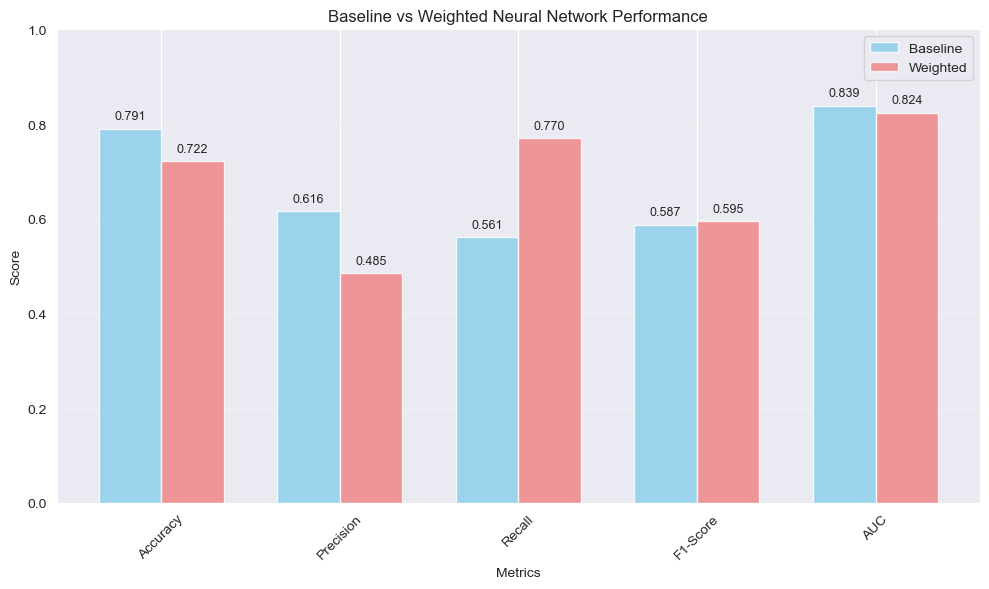

✅ Comparison plot saved to: ../reports/NN_plots/nn_baseline_vs_weighted.png


In [35]:

# VISUALIZE COMPARISON
print("\n" + "=" * 80)
print("COMPARISON: BASELINE vs WEIGHTED NEURAL NETWORK")

# Create comparison table
comparison_data = {
    'Model': ['Neural Network (Baseline)', 'Neural Network (Weighted)'],
    'Accuracy': [nn_accuracy, accuracy_score(y_test_nn, y_pred_nn_weighted)],
    'Precision': [nn_precision, precision_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0)],
    'Recall': [nn_recall, recall_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0)],
    'F1-Score': [nn_f1, f1_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0)],
    'AUC': [nn_auc, roc_auc_score(y_test_nn, y_pred_nn_weighted_prob)]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Comparison:")
print(comparison_df.to_string(index=False))

# Visual comparison
fig, ax = plt.subplots(figsize=(10, 6))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics_to_plot))
width = 0.35

# Get metric values
baseline_metrics = [comparison_df.loc[0, m] for m in metrics_to_plot]
weighted_metrics = [comparison_df.loc[1, m] for m in metrics_to_plot]

ax.bar(x - width / 2, baseline_metrics, width, label='Baseline', color='skyblue', alpha=0.8)
ax.bar(x + width / 2, weighted_metrics, width, label='Weighted', color='lightcoral', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Baseline vs Weighted Neural Network Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot, rotation=45)
ax.set_ylim([0, 1])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (base_val, weight_val) in enumerate(zip(baseline_metrics, weighted_metrics)):
    ax.text(i - width / 2, base_val + 0.02, f'{base_val:.3f}', ha='center', fontsize=9)
    ax.text(i + width / 2, weight_val + 0.02, f'{weight_val:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../reports/NN_plots/nn_baseline_vs_weighted.png', dpi=300, bbox_inches='tight')
plt.show()
print("Comparison plot saved to: ../reports/NN_plots/nn_baseline_vs_weighted.png")


----------------------------------------
ROC CURVE COMPARISON
----------------------------------------


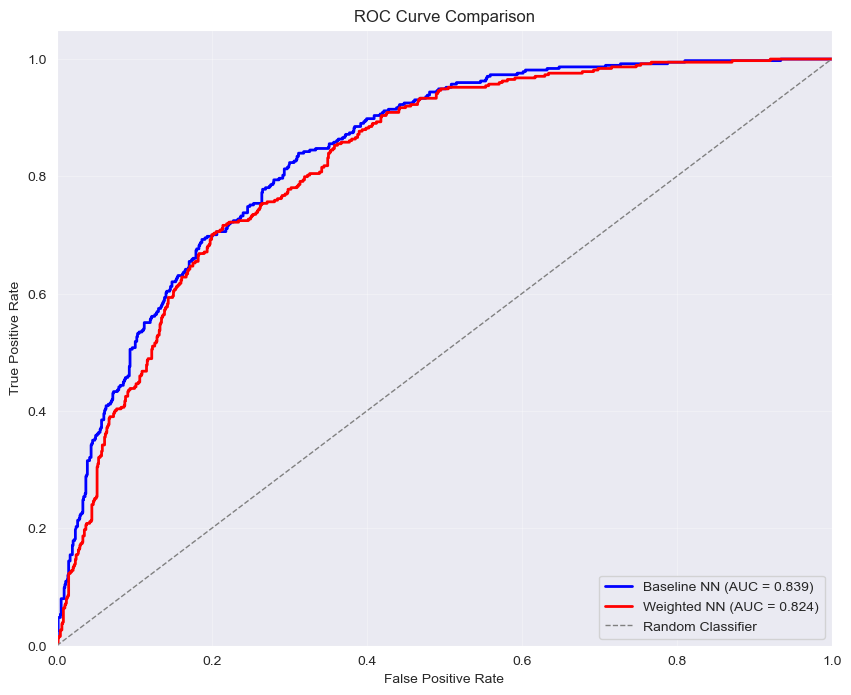

✅ ROC curve saved to: ../reports/NN_plots/roc_curve_comparison.png


In [36]:

# ROC CURVE COMPARISON
print("\n" + "-" * 40)
print("ROC CURVE COMPARISON")

# Calculate ROC curves
fpr_baseline, tpr_baseline, _ = roc_curve(y_test_nn, y_pred_nn_prob)
fpr_weighted, tpr_weighted, _ = roc_curve(y_test_nn, y_pred_nn_weighted_prob)
roc_auc_baseline = auc(fpr_baseline, tpr_baseline)
roc_auc_weighted = auc(fpr_weighted, tpr_weighted)

plt.figure(figsize=(10, 8))
plt.plot(fpr_baseline, tpr_baseline, color='blue', lw=2,
         label=f'Baseline NN (AUC = {roc_auc_baseline:.3f})')
plt.plot(fpr_weighted, tpr_weighted, color='red', lw=2,
         label=f'Weighted NN (AUC = {roc_auc_weighted:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig('../reports/NN_plots/roc_curve_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("ROC curve saved to: ../reports/NN_plots/roc_curve_comparison.png")


In [37]:

# Save predictions and metrics
results_df = pd.DataFrame({
    'y_true': y_test_nn.values,
    'y_pred_baseline': y_pred_nn,
    'y_prob_baseline': y_pred_nn_prob.flatten(),
    'y_pred_weighted': y_pred_nn_weighted,
    'y_prob_weighted': y_pred_nn_weighted_prob.flatten()
})
results_df.to_csv('../reports/NN_plots/nn_predictions.csv', index=False)
print("Predictions saved to: ../reports/NN_plots/nn_predictions.csv")

# Save comparison results
comparison_df.to_csv('../reports/NN_plots/nn_model_comparison.csv', index=False)
print("Model comparison saved to: ../reports/NN_plots/nn_model_comparison.csv")

✅ Predictions saved to: ../reports/NN_plots/nn_predictions.csv
✅ Model comparison saved to: ../reports/NN_plots/nn_model_comparison.csv


In [40]:

# SUMMARY REPORT
print("\n" + "=" * 80)
print("SUMMARY REPORT")

print("\nBest Performing Neural Network Model:")
best_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
print(f"  Model: {best_model_name}")
print(f"  F1-Score: {comparison_df.loc[best_idx, 'F1-Score']:.4f}")
print(f"  Accuracy: {comparison_df.loc[best_idx, 'Accuracy']:.4f}")
print(f"  Recall: {comparison_df.loc[best_idx, 'Recall']:.4f}")
print(f"  Precision: {comparison_df.loc[best_idx, 'Precision']:.4f}")
print(f"  AUC: {comparison_df.loc[best_idx, 'AUC']:.4f}")



SUMMARY REPORT

Best Performing Neural Network Model:
  Model: Neural Network (Weighted)
  F1-Score: 0.5950
  Accuracy: 0.7218
  Recall: 0.7701
  Precision: 0.4848
  AUC: 0.8238


In [41]:
# SIMPLE HYPERPARAMETER GRID SEARCH

print("\n" + "=" * 80)
print("SIMPLE GRID SEARCH FOR NEURAL NETWORK")
print("=" * 80)

# Split training data into training and validation sets for hyperparameter tuning
X_train_tune, X_val_tune, y_train_tune, y_val_tune = train_test_split(
    X_train_nn, y_train_nn,
    test_size=0.2,
    random_state=42,
    stratify=y_train_nn
)

print(f"Training set for tuning: {X_train_tune.shape}")
print(f"Validation set for tuning: {X_val_tune.shape}")

# Define hyperparameter grid
param_grid = {
    'hidden_units': [(64, 32), (128, 64), (256, 128)],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.001, 0.0005, 0.0001],
    'batch_size': [16, 32, 64]
}

best_score = 0
best_params = {}
best_model_grid = None

results = []

# Calculate total combinations
total_combos = (
    len(param_grid['hidden_units']) *
    len(param_grid['dropout_rate']) *
    len(param_grid['learning_rate']) *
    len(param_grid['batch_size'])
)
current_combo = 0

for hidden_units in param_grid['hidden_units']:
    for dropout_rate in param_grid['dropout_rate']:
        for learning_rate in param_grid['learning_rate']:
            for batch_size in param_grid['batch_size']:

                current_combo += 1
                print(f"\n[{current_combo}/{total_combos}] Trying: "
                      f"hidden_units={hidden_units}, dropout={dropout_rate}, "
                      f"lr={learning_rate}, batch_size={batch_size}")

                # Build model
                model = tf.keras.Sequential([
                    tf.keras.layers.Input(shape=(input_dim,)),
                    tf.keras.layers.Dense(hidden_units[0], activation='relu'),
                    tf.keras.layers.BatchNormalization(),
                    tf.keras.layers.Dropout(dropout_rate),
                    tf.keras.layers.Dense(hidden_units[1], activation='relu'),
                    tf.keras.layers.BatchNormalization(),
                    tf.keras.layers.Dropout(dropout_rate),
                    tf.keras.layers.Dense(1, activation='sigmoid')
                ])

                model.compile(
                    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'auc']
                )

                # Train with early stopping
                history = model.fit(
                    X_train_tune, y_train_tune,  # Use training subset for tuning
                    validation_data=(X_val_tune, y_val_tune),  # Use validation subset
                    epochs=50,
                    batch_size=batch_size,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
                    ],
                    verbose=0
                )

                # Evaluate on validation set
                y_pred_prob = model.predict(X_val_tune, verbose=0)
                auc_score = roc_auc_score(y_val_tune, y_pred_prob)

                # Also calculate F1 score for churn prediction
                y_pred = (y_pred_prob > 0.5).astype(int).flatten()
                f1 = f1_score(y_val_tune, y_pred, pos_label=1, zero_division=0)

                results.append({
                    'hidden_units': str(hidden_units),
                    'dropout_rate': dropout_rate,
                    'learning_rate': learning_rate,
                    'batch_size': batch_size,
                    'val_auc': auc_score,
                    'val_f1': f1,
                    'epochs': len(history.history['loss'])
                })

                print(f"  AUC: {auc_score:.4f}, F1: {f1:.4f}, Epochs: {len(history.history['loss'])}")

                # Use F1 score as primary metric (better for imbalanced churn data)
                if f1 > best_score:
                    best_score = f1
                    best_params = {
                        'hidden_units': hidden_units,
                        'dropout_rate': dropout_rate,
                        'learning_rate': learning_rate,
                        'batch_size': batch_size,
                        'val_f1': f1,
                        'val_auc': auc_score
                    }
                    best_model_grid = model

print("\n" + "=" * 80)
print("BEST PARAMETERS FROM GRID SEARCH:")
print("=" * 80)
for key, value in best_params.items():
    print(f"{key}: {value}")
print(f"Best Validation F1-Score: {best_score:.4f}")

# Save results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('val_f1', ascending=False)
results_df.to_csv('../reports/hyperparameter_tuning_results.csv', index=False)
print(f"\nHyperparameter tuning results saved to: ../reports/hyperparameter_tuning_results.csv")


SIMPLE GRID SEARCH FOR NEURAL NETWORK
Training set for tuning: (4507, 30)
Validation set for tuning: (1127, 30)

[1/81] Trying: hidden_units=(64, 32), dropout=0.2, lr=0.001, batch_size=16
  AUC: 0.8473, F1: 0.6270, Epochs: 11

[2/81] Trying: hidden_units=(64, 32), dropout=0.2, lr=0.001, batch_size=32
  AUC: 0.8447, F1: 0.6085, Epochs: 19

[3/81] Trying: hidden_units=(64, 32), dropout=0.2, lr=0.001, batch_size=64
  AUC: 0.8461, F1: 0.6230, Epochs: 11

[4/81] Trying: hidden_units=(64, 32), dropout=0.2, lr=0.0005, batch_size=16
  AUC: 0.8457, F1: 0.6065, Epochs: 12

[5/81] Trying: hidden_units=(64, 32), dropout=0.2, lr=0.0005, batch_size=32
  AUC: 0.8465, F1: 0.6123, Epochs: 37

[6/81] Trying: hidden_units=(64, 32), dropout=0.2, lr=0.0005, batch_size=64
  AUC: 0.8434, F1: 0.6225, Epochs: 41

[7/81] Trying: hidden_units=(64, 32), dropout=0.2, lr=0.0001, batch_size=16
  AUC: 0.8459, F1: 0.5889, Epochs: 36

[8/81] Trying: hidden_units=(64, 32), dropout=0.2, lr=0.0001, batch_size=32
  AUC: 0


EVALUATING TUNED MODEL AND COMPARING WITH PREVIOUS MODELS

📊 RETRIEVING PREVIOUS MODEL RESULTS...
----------------------------------------
Baseline Model Results:
  Accuracy:  0.7906
  Precision: 0.6158
  Recall:    0.5615
  F1-Score:  0.5874
  AUC:       0.8389

Weighted Model Results:
  Accuracy:  0.7218
  Precision: 0.4848
  Recall:    0.7701
  F1-Score:  0.5950
  AUC:       0.8238

TRAINING BEST TUNED MODEL ON FULL TRAINING DATA
Epoch 1/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6647 - auc: 0.7054 - loss: 0.6802 - precision: 0.4132 - recall: 0.6167 - val_accuracy: 0.7516 - val_auc: 0.8126 - val_loss: 0.4988 - val_precision: 0.5188 - val_recall: 0.7017 - learning_rate: 5.0000e-04
Epoch 2/100
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7531 - auc: 0.7731 - loss: 0.5332 - precision: 0.5333 - recall: 0.5808 - val_accuracy: 0.7799 - val_auc: 0.8186 - val_loss: 0.4600 - val_precision: 0.5728 - val_recall: 0.6271 - learning_rate: 5.0000e-04
Epoch 3/100
282/282 

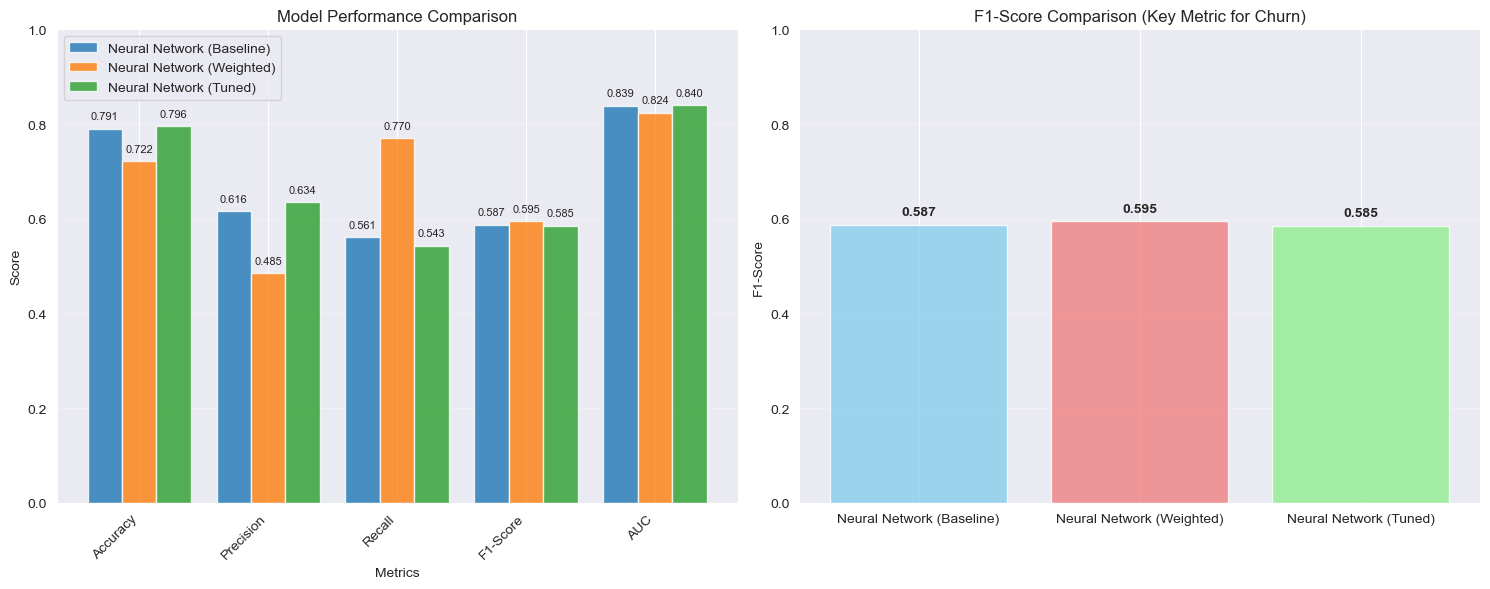

✅ Model comparison plot saved to: ../reports/nn_model_comparison_after_tuning.png
✅ Tuned model predictions saved

HYPERPARAMETER TUNING EVALUATION COMPLETE!


In [42]:
# EVALUATE BEST TUNED MODEL AND COMPARE WITH PREVIOUS MODELS


print("EVALUATING TUNED MODEL AND COMPARING WITH PREVIOUS MODELS")

# FIRST, GET YOUR PREVIOUS MODEL RESULTS
print("\nRETRIEVING PREVIOUS MODEL RESULTS...")


try:
    print(f"Baseline Model Results:")
    print(f"  Accuracy:  {nn_accuracy:.4f}")
    print(f"  Precision: {nn_precision:.4f}")
    print(f"  Recall:    {nn_recall:.4f}")
    print(f"  F1-Score:  {nn_f1:.4f}")
    print(f"  AUC:       {nn_auc:.4f}")

    baseline_results = {
        'Model': 'Neural Network (Baseline)',
        'Accuracy': nn_accuracy,
        'Precision': nn_precision,
        'Recall': nn_recall,
        'F1-Score': nn_f1,
        'AUC': nn_auc
    }
except NameError:
    print("Baseline model results not found. Run baseline model evaluation first.")
    # You can run this quick evaluation if needed:
    print("Running quick baseline evaluation...")
    # Add your baseline model evaluation code here

# Your weighted model results (from earlier in your notebook)
try:
    weighted_accuracy = accuracy_score(y_test_nn, y_pred_nn_weighted)
    weighted_precision = precision_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0)
    weighted_recall = recall_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0)
    weighted_f1 = f1_score(y_test_nn, y_pred_nn_weighted, pos_label=1, zero_division=0)
    weighted_auc = roc_auc_score(y_test_nn, y_pred_nn_weighted_prob)

    print(f"\nWeighted Model Results:")
    print(f"  Accuracy:  {weighted_accuracy:.4f}")
    print(f"  Precision: {weighted_precision:.4f}")
    print(f"  Recall:    {weighted_recall:.4f}")
    print(f"  F1-Score:  {weighted_f1:.4f}")
    print(f"  AUC:       {weighted_auc:.4f}")

    weighted_results = {
        'Model': 'Neural Network (Weighted)',
        'Accuracy': weighted_accuracy,
        'Precision': weighted_precision,
        'Recall': weighted_recall,
        'F1-Score': weighted_f1,
        'AUC': weighted_auc
    }
except NameError:
    print("Weighted model results not found.")

# TRAIN BEST TUNED MODEL ON FULL TRAINING DATA
print("\n" + "=" * 80)
print("TRAINING BEST TUNED MODEL ON FULL TRAINING DATA")

# Rebuild best model with best parameters
best_tuned_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(best_params['hidden_units'][0], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(best_params['dropout_rate']),
    tf.keras.layers.Dense(best_params['hidden_units'][1], activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(best_params['dropout_rate']),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

best_tuned_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params['learning_rate']),
    loss='binary_crossentropy',
    metrics=['accuracy', 'auc', 'precision', 'recall']
)

# Train on full training data
history_tuned = best_tuned_model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=100,
    batch_size=best_params['batch_size'],
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6
        )
    ],
    verbose=1
)

print(f"\nTraining completed in {len(history_tuned.history['loss'])} epochs")

# EVALUATE TUNED MODEL ON TEST SET
print("\n" + "=" * 80)
print("EVALUATING TUNED MODEL ON TEST SET")

y_pred_tuned_prob = best_tuned_model.predict(X_test_nn)
y_pred_tuned = (y_pred_tuned_prob > 0.5).astype(int).flatten()

# Calculate metrics for tuned model
tuned_accuracy = accuracy_score(y_test_nn, y_pred_tuned)
tuned_precision = precision_score(y_test_nn, y_pred_tuned, pos_label=1, zero_division=0)
tuned_recall = recall_score(y_test_nn, y_pred_tuned, pos_label=1, zero_division=0)
tuned_f1 = f1_score(y_test_nn, y_pred_tuned, pos_label=1, zero_division=0)
tuned_auc = roc_auc_score(y_test_nn, y_pred_tuned_prob)

print(f"Tuned Model Results:")
print(f"  Accuracy:  {tuned_accuracy:.4f}")
print(f"  Precision: {tuned_precision:.4f}")
print(f"  Recall:    {tuned_recall:.4f}")
print(f"  F1-Score:  {tuned_f1:.4f}")
print(f"  AUC:       {tuned_auc:.4f}")

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test_nn, y_pred_tuned, target_names=['No Churn', 'Churn'], zero_division=0))

print("Confusion Matrix (Tuned Model):")
cm_tuned = confusion_matrix(y_test_nn, y_pred_tuned)
print(cm_tuned)

tuned_results = {
    'Model': 'Neural Network (Tuned)',
    'Accuracy': tuned_accuracy,
    'Precision': tuned_precision,
    'Recall': tuned_recall,
    'F1-Score': tuned_f1,
    'AUC': tuned_auc
}

# COMPARE ALL MODELS
print("\n" + "=" * 80)
print("COMPARING ALL MODELS")

# Create comparison dataframe
all_models_data = []

# Add baseline model if available
if 'baseline_results' in locals():
    all_models_data.append(baseline_results)

# Add weighted model if available
if 'weighted_results' in locals():
    all_models_data.append(weighted_results)

# Add tuned model
all_models_data.append(tuned_results)

# Create comparison table
comparison_df = pd.DataFrame(all_models_data)

print("\nMODEL COMPARISON TABLE:")
print("-" * 60)
print(comparison_df.to_string(index=False))

# Find best model for each metric
print("\nBEST MODEL FOR EACH METRIC:")
print("-" * 40)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_value = comparison_df.loc[best_idx, metric]
    print(f"{metric}: {best_model} ({best_value:.4f})")

# Overall best model (based on F1-Score for churn prediction)
best_f1_idx = comparison_df['F1-Score'].idxmax()
best_model_overall = comparison_df.loc[best_f1_idx, 'Model']
print(f"\nOVERALL BEST MODEL (based on F1-Score): {best_model_overall} ")
print(f"   F1-Score: {comparison_df.loc[best_f1_idx, 'F1-Score']:.4f}")
print(f"   Precision: {comparison_df.loc[best_f1_idx, 'Precision']:.4f}")
print(f"   Recall: {comparison_df.loc[best_f1_idx, 'Recall']:.4f}")

# CALCULATE IMPROVEMENT FROM BASELINE
if 'baseline_results' in locals():
    print("\n" + "=" * 80)
    print("IMPROVEMENT ANALYSIS")
    print("=" * 80)

    f1_improvement = tuned_f1 - nn_f1
    precision_improvement = tuned_precision - nn_precision

    print(f"Tuned vs Baseline Improvement:")
    print(f"  F1-Score: {f1_improvement:+.4f} ({f1_improvement*100:+.1f}%)")
    print(f"  Precision: {precision_improvement:+.4f} ({precision_improvement*100:+.1f}%)")

    if f1_improvement > 0:
        print(f"\nHyperparameter tuning IMPROVED F1-Score by {f1_improvement*100:+.1f}%")
    else:
        print(f"\nHyperparameter tuning did NOT improve F1-Score")

# VISUALIZE COMPARISON
print("\n" + "=" * 80)
print("VISUALIZING MODEL COMPARISON")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics_to_plot))
width = 0.8 / len(comparison_df)  # Dynamic width based on number of models

for i, (_, row) in enumerate(comparison_df.iterrows()):
    model_metrics = [row[m] for m in metrics_to_plot]
    axes[0].bar(x + i*width - (len(comparison_df)-1)*width/2,
                model_metrics, width, label=row['Model'], alpha=0.8)

axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_to_plot, rotation=45, ha='right')
axes[0].set_ylim([0, 1])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Add value labels
for i, metric in enumerate(metrics_to_plot):
    for j, (_, row) in enumerate(comparison_df.iterrows()):
        height = row[metric]
        axes[0].text(i + j*width - (len(comparison_df)-1)*width/2,
                    height + 0.02, f'{height:.3f}',
                    ha='center', fontsize=8)

# F1-Score focused comparison
models = comparison_df['Model'].tolist()
f1_scores = comparison_df['F1-Score'].tolist()

colors = ['skyblue', 'lightcoral', 'lightgreen'][:len(models)]
axes[1].bar(models, f1_scores, color=colors, alpha=0.8)
axes[1].set_ylabel('F1-Score')
axes[1].set_title('F1-Score Comparison (Key Metric for Churn)')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (model, score) in enumerate(zip(models, f1_scores)):
    axes[1].text(i, score + 0.02, f'{score:.3f}', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/nn_model_comparison_after_tuning.png', dpi=300, bbox_inches='tight')
plt.show()
print("Model comparison plot saved to: ../reports/nn_model_comparison_after_tuning.png")

# Save predictions
predictions_df = pd.DataFrame({
    'y_true': y_test_nn.values,
    'y_pred_tuned': y_pred_tuned,
    'y_prob_tuned': y_pred_tuned_prob.flatten()
})
predictions_df.to_csv('../reports/nn_tuned_predictions.csv', index=False)
print("Tuned model predictions saved")

print("HYPERPARAMETER TUNING EVALUATION COMPLETE!")
